In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [3]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

In [4]:
data  = pd.read_csv('iris.data',header = None)
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.columns = ['sepal_length','sepal_width','petal_length','petal_width','species']
data.dropna(how='all',inplace = True)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


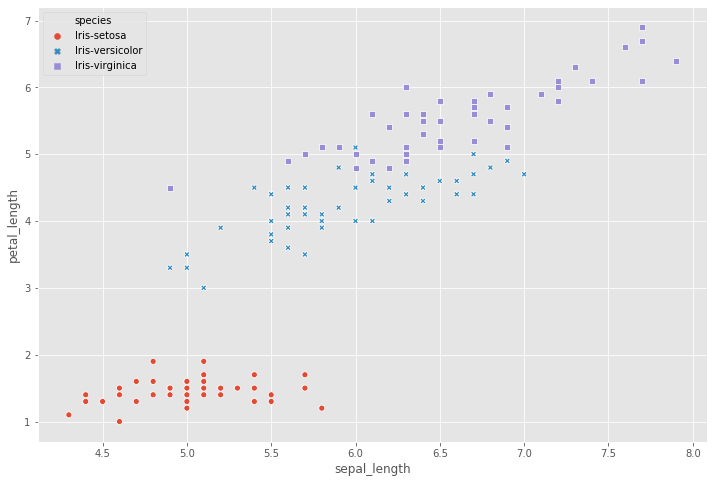

In [7]:
sns.scatterplot(x ='sepal_length', y = 'petal_length' ,data = data,hue = 'species',style = 'species')

In [8]:
x = data.iloc[:,0:4]
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
#zero  mean and unit standard deviation
y = data.species.values
x = StandardScaler().fit_transform(x)

In [10]:
covariance_matrix = np.cov(x.T)
covariance_matrix

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [11]:
eigen_values,eigen_vectors = np.linalg.eig(covariance_matrix)

In [12]:
eigen_values

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

In [13]:
eigen_vectors

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [14]:
for value in eigen_values:
    print(value)

2.930353775589318
0.9274036215173415
0.1483422264816396
0.020746013995595936


In [15]:
s = np.sum(eigen_values)
variance_explained = [(eigen_value/s) for eigen_value in eigen_values]
variance_explained

[0.7277045209380135,
 0.23030523267680633,
 0.036838319576273815,
 0.0051519268089063215]

In [16]:
cumulative_variance_explained = np.cumsum(variance_explained)
cumulative_variance_explained

array([0.72770452, 0.95800975, 0.99484807, 1.        ])

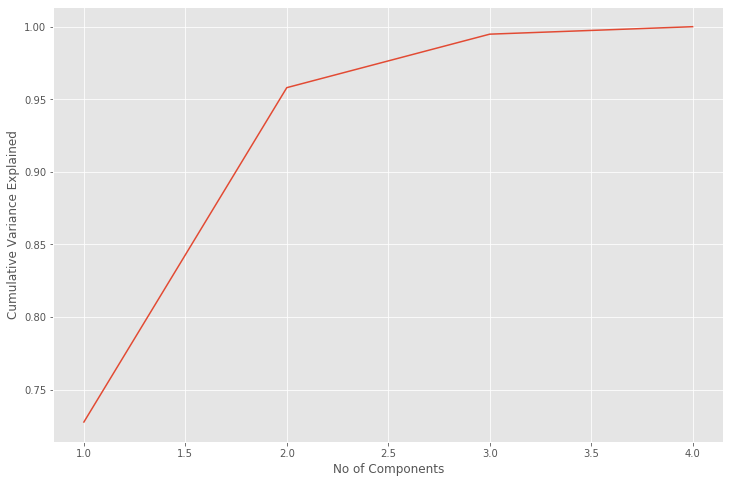

In [17]:
sns.lineplot(x = [1,2,3,4],y = cumulative_variance_explained)
plt.xlabel('No of Components')
plt.ylabel('Cumulative Variance Explained')
plt.show()

In [18]:
eigen_vectors

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [19]:
projection_matrix = (eigen_vectors.T)[:2].T
projection_matrix

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])

In [20]:
X_pca = x.dot(projection_matrix)

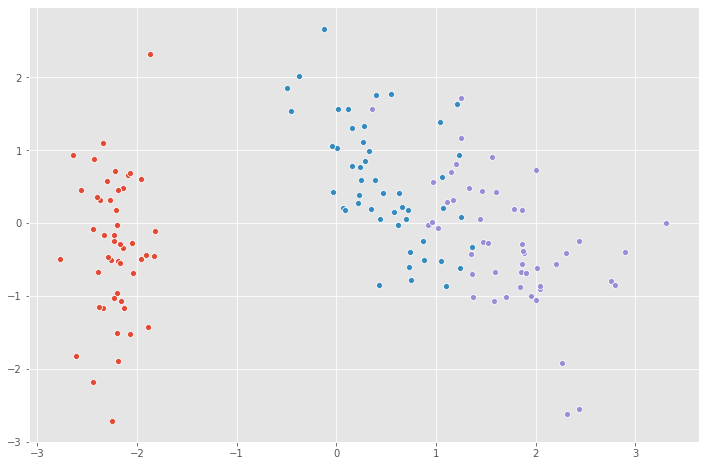

In [21]:
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']
for s in species:
    sns.scatterplot(X_pca[y == s ,0],X_pca[y == s ,1])
plt.show()

In [22]:
from sklearn.svm import LinearSVC

In [24]:
clf = LinearSVC()
clf.fit(X_pca,y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [25]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y,clf.predict(X_pca))
matrix

array([[50,  0,  0],
       [ 0, 41,  9],
       [ 0,  4, 46]])